In [1]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import scipy.stats as stats


In [2]:
df = pd.read_csv('my_dataframe.csv')
df

,Unnamed: 0,OPEFLAG,CONTROL,TUITFTE,INEXPFTE,AVGFACSAL,OPENADMP,ADM_RATE,SAT_AVG,ACTCMMID,...,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,PPTUG_EF2,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NUM4_PUB,NUM4_PRIV,PFTFAC
0,0,1,1,7413.0,5384.0,7101.0,2.0,0.8986,957.0,18.0,...,0.105148,0.062147,0.040804,NaN,14444.0,NaN,13893.0,592.0,NaN,0.7411
1,1,1,1,13177.0,16454.0,10717.0,2.0,0.9211,1220.0,25.0,...,0.142351,0.114589,0.135644,NaN,17005.0,NaN,14550.0,1229.0,NaN,0.7766
2,2,1,2,14273.0,4206.0,4292.0,1.0,NaN,NaN,NaN,...,0.064189,NaN,NaN,NaN,NaN,15322.0,NaN,NaN,5.0,1.0000
3,3,1,1,8677.0,9242.0,9442.0,2.0,0.8087,1314.0,28.0,...,0.146923,0.150691,0.190038,NaN,20909.0,NaN,17561.0,585.0,NaN,0.6544
4,4,1,1,10160.0,8527.0,7754.0,2.0,0.9774,972.0,18.0,...,0.112620,0.052716,0.041534,NaN,13043.0,NaN,11344.0,523.0,NaN,0.5826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,6299,1,2,6477.0,6188.0,2667.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2054,6314,1,1,12317.0,153080.0,18393.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9260
2055,6318,1,3,24145.0,23749.0,6620.0,2.0,0.2500,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2500
2056,6319,1,2,9970.0,4515.0,5794.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,14368.0,NaN,NaN,34.0,1.0000


In [3]:
df.corr()

,Unnamed: 0,OPEFLAG,CONTROL,TUITFTE,INEXPFTE,AVGFACSAL,OPENADMP,ADM_RATE,SAT_AVG,ACTCMMID,...,INC_PCT_M2,INC_PCT_H1,INC_PCT_H2,PPTUG_EF2,NPT4_PUB,NPT4_PRIV,NPT41_PUB,NUM4_PUB,NUM4_PRIV,PFTFAC
Unnamed: 0,1.000000,0.065110,0.245030,-0.050470,-0.108955,-0.229474,-0.211022,0.102769,-0.051409,-0.044808,...,-0.144543,-0.139121,-0.149019,NaN,-0.034676,-0.200207,-0.062174,-0.171160,-0.190000,-0.126385
OPEFLAG,0.065110,1.000000,0.030177,-0.052786,0.056657,-0.026637,-0.034813,-0.075606,0.093910,0.100973,...,-0.039670,-0.056696,-0.045485,NaN,0.016340,-0.057371,0.040035,-0.063343,-0.056230,0.025047
CONTROL,0.245030,0.030177,1.000000,0.377622,-0.101245,-0.285675,-0.246488,-0.095363,0.077971,0.084381,...,-0.108698,-0.114823,-0.051451,NaN,NaN,0.040987,NaN,NaN,-0.151861,-0.283464
TUITFTE,-0.050470,-0.052786,0.377622,1.000000,0.344475,0.313432,0.087177,-0.242935,0.533005,0.551289,...,-0.093185,0.032104,0.347759,NaN,0.522065,0.502630,0.257766,0.338214,0.166851,-0.047581
INEXPFTE,-0.108955,0.056657,-0.101245,0.344475,1.000000,0.494544,0.224718,-0.408040,0.637513,0.636834,...,-0.027172,0.040766,0.300062,NaN,0.189488,0.232197,0.005522,0.290556,0.143091,0.158599
AVGFACSAL,-0.229474,-0.026637,-0.285675,0.313432,0.494544,1.000000,0.314739,-0.331744,0.699724,0.713289,...,-0.100672,0.010643,0.453780,NaN,0.219643,0.523265,-0.017400,0.471987,0.433414,0.141384
OPENADMP,-0.211022,-0.034813,-0.246488,0.087177,0.224718,0.314739,1.000000,NaN,NaN,NaN,...,0.291932,0.401134,0.366594,NaN,0.151418,0.265598,0.032419,0.198726,0.168727,0.215751
ADM_RATE,0.102769,-0.075606,-0.095363,-0.242935,-0.408040,-0.331744,NaN,1.000000,-0.450530,-0.451022,...,0.130820,0.126617,-0.155036,NaN,0.124977,-0.122383,0.217720,-0.165901,-0.108489,-0.075678
SAT_AVG,-0.051409,0.093910,0.077971,0.533005,0.637513,0.699724,NaN,-0.450530,1.000000,0.979236,...,-0.109433,0.139903,0.645601,NaN,0.257933,0.431314,-0.068049,0.358893,0.330277,0.199096
ACTCMMID,-0.044808,0.100973,0.084381,0.551289,0.636834,0.713289,NaN,-0.451022,0.979236,1.000000,...,-0.140009,0.142087,0.679341,NaN,0.337196,0.451602,-0.030613,0.331058,0.345974,0.181706


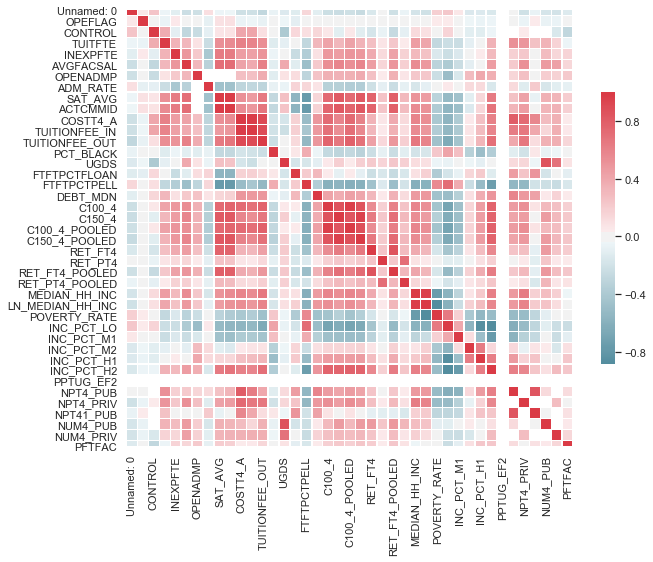

In [5]:
# heatmap
sns.set(style="white")
# Compute the correlation matrix
corr = df.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

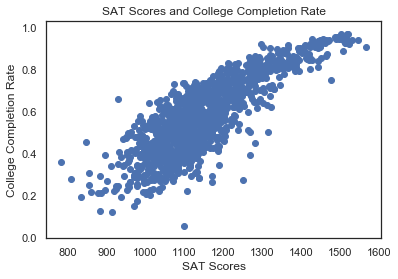

In [10]:
# scatterplots of testing scores vs college completion rate
fig, ax = plt.subplots()
ax.set_title('SAT Scores and College Completion Rate')
ax.set_xlabel('SAT Scores')
ax.set_ylabel('College Completion Rate')
x = df['SAT_AVG']
y = df['C150_4_POOLED']
ax.scatter(x, y)
plt.show()

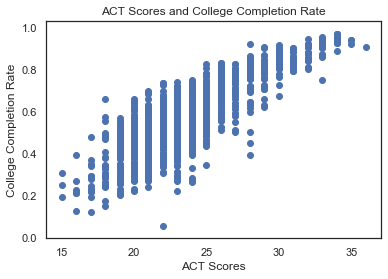

In [11]:
# scatterplots of testing scores vs college completion rate
fig, ax = plt.subplots()
ax.set_title('ACT Scores and College Completion Rate')
ax.set_xlabel('ACT Scores')
ax.set_ylabel('College Completion Rate')
x = df['ACTCMMID']
y = df['C150_4_POOLED']
ax.scatter(x, y)
plt.show()

In [ ]:
# ANOVA test for SAT Scores and College Completion Rate